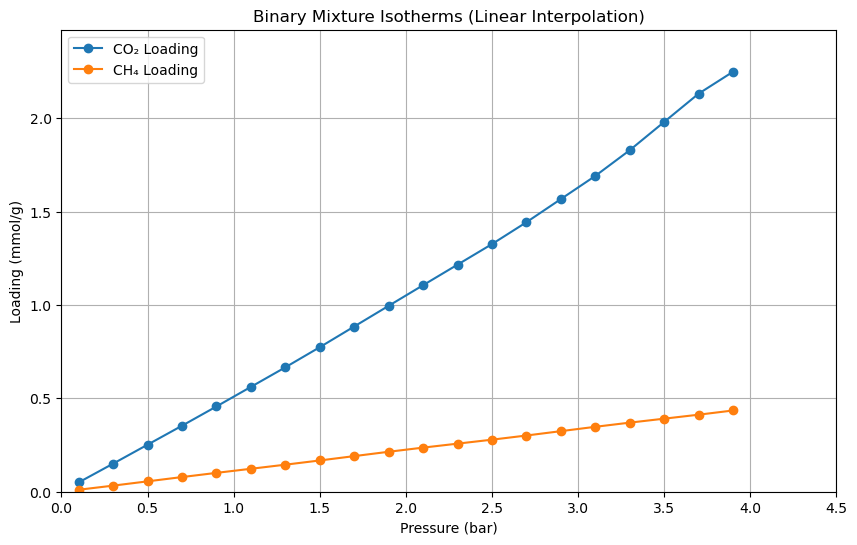

In [2]:
import pandas as pd
import numpy as np
import pyiast
import matplotlib.pyplot as plt

# Load the pure-component isotherm data into Pandas DataFrames
df_co2 = pd.read_csv("CO2_IRMOF1.csv")
df_ch4 = pd.read_csv("CH4_IRMOF1.csv")

# Construct InterpolatorIsotherm instances for CO2 and CH4
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                            loading_key="Loading(mmol/g)",
                                            pressure_key="Pressure(bar)")
ch4_isotherm = pyiast.InterpolatorIsotherm(df_ch4,
                                            loading_key="Loading(mmol/g)",
                                            pressure_key="Pressure(bar)")

# Define the pressure range from 0.1 to 4.0 bar with increments of 0.2
pressure_range = np.arange(0.1, 4.1, 0.2)

# Calculate the loading for each pressure in the range for both components
co2_loading = [co2_isotherm.loading(p) for p in pressure_range]
ch4_loading = [ch4_isotherm.loading(p) for p in pressure_range]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(pressure_range, co2_loading, label='CO₂ Loading', marker='o')
plt.plot(pressure_range, ch4_loading, label='CH₄ Loading', marker='o')
plt.title('Binary Mixture Isotherms (Linear Interpolation)')
plt.xlabel('Pressure (bar)')
plt.ylabel('Loading (mmol/g)')
plt.legend()
plt.grid()
plt.xlim(0, 4.5)  # Set limits for x-axis
plt.ylim(0, max(max(co2_loading), max(ch4_loading)) * 1.1)  # Extend y-axis for better visibility
plt.show()
